In [1]:
import pandas as pd
import matplotlib.patches as patches
import matplotlib.colorbar as cbar
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
import numpy as np
import scipy.stats as stats

In [2]:
#read data and create a dataframe
df = pd.read_csv('fbref_data.txt')
df

,Squad,# Pl,90s,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Tkl.1,Att,...,Mid 3rd.1,Att 3rd.1,Blocks,Sh,ShSv,Pass,Int,Tkl+Int,Clr,Err
0,Alavés,27,22.0,346,217,175,137,34,104,325,...,1411,700,346,52,2,294,215,561,562,6
1,Athletic Club,24,21.0,299,185,134,128,37,82,280,...,1164,703,287,35,2,252,151,450,422,2
2,Atlético Madrid,23,20.0,355,235,164,142,49,144,347,...,1138,567,320,49,0,271,191,546,408,3
3,Barcelona,24,21.0,292,184,136,117,39,106,255,...,1113,643,310,46,0,264,156,448,257,7
4,Betis,25,22.0,344,226,157,142,45,100,295,...,1369,627,299,41,2,258,236,580,432,6
5,Cádiz,32,22.0,367,236,195,134,38,129,365,...,1339,521,356,62,2,294,220,587,476,7
6,Celta Vigo,27,22.0,385,238,176,174,35,121,382,...,1632,608,344,52,1,292,191,576,530,2
7,Eibar,28,22.0,344,222,146,152,46,112,320,...,1270,839,324,40,2,284,194,538,553,2
8,Elche,27,20.0,323,213,201,108,14,104,316,...,1071,367,320,71,2,249,176,499,431,6
9,Getafe,27,22.0,347,229,150,156,41,117,324,...,1632,726,328,44,2,284,212,559,553,3


In [3]:
#check na values
df.isna().sum()

Squad        0
# Pl         0
90s          0
Tkl          0
TklW         0
Def 3rd      0
Mid 3rd      0
Att 3rd      0
Tkl.1        0
Att          0
Tkl%         0
Past         0
Press        0
Succ         0
%            0
Def 3rd.1    0
Mid 3rd.1    0
Att 3rd.1    0
Blocks       0
Sh           0
ShSv         0
Pass         0
Int          0
Tkl+Int      0
Clr          0
Err          0
dtype: int64

In [4]:
#show all columns name
df.columns

Index(['Squad', '# Pl', '90s', 'Tkl', 'TklW', 'Def 3rd', 'Mid 3rd', 'Att 3rd',
       'Tkl.1', 'Att', 'Tkl%', 'Past', 'Press', 'Succ', '%', 'Def 3rd.1',
       'Mid 3rd.1', 'Att 3rd.1', 'Blocks', 'Sh', 'ShSv', 'Pass', 'Int',
       'Tkl+Int', 'Clr', 'Err'],
      dtype='object')

In [5]:
#show a list of squads in the dataframe
df['Squad'].unique()

array(['Alavés', 'Athletic Club', 'Atlético Madrid', 'Barcelona', 'Betis',
       'Cádiz', 'Celta Vigo', 'Eibar', 'Elche', 'Getafe', 'Granada',
       'Huesca', 'Levante', 'Osasuna', 'Real Madrid', 'Real Sociedad',
       'Sevilla', 'Valencia', 'Valladolid', 'Villarreal'], dtype=object)

In [6]:
#new dataframe with champions league squads and their pressures in different zones
cols = ['Squad','# Pl', 'Def 3rd.1', 'Mid 3rd.1', 'Att 3rd.1', 'Def 3rd', 'Mid 3rd', 'Att 3rd']
df_plot = df[cols]

#adjust metrics by minutes played if needed
df_plot = df_plot[cols[1:]].apply(lambda x: x / df_plot['# Pl'])

#calculate the percentage applied in each third of the pitch
df_plot['Total_press'] = df[['Def 3rd.1', 'Mid 3rd.1', 'Att 3rd.1']].sum(axis=1)
df_plot['Total_tackles'] = df[['Def 3rd', 'Mid 3rd', 'Att 3rd']].sum(axis=1)
df_plot['z_1'] = round((df_plot['Def 3rd.1'] / df_plot['Total_press']) * 100,1) 
df_plot['z_2'] = round((df_plot['Mid 3rd.1'] / df_plot['Total_press']) * 100,1)
df_plot['z_3'] = round((df_plot['Att 3rd.1'] / df_plot['Total_press']) * 100,1)

#calculate z score
df_plot[['z_1_adj','z_2_adj','z_3_adj']] = df_plot[['Def 3rd.1', 'Mid 3rd.1', 'Att 3rd.1']].apply(stats.zscore)

#add squad column
df_plot['Squad'] = df[cols[:1]]

df_plot.sort_values(by='z_3', ascending=False)

,# Pl,Def 3rd.1,Mid 3rd.1,Att 3rd.1,Def 3rd,Mid 3rd,Att 3rd,Total_press,Total_tackles,z_1,z_2,z_3,z_1_adj,z_2_adj,z_3_adj,Squad
3,1.0,29.625000,46.375000,26.791667,5.666667,4.875000,1.625000,2467,292,1.2,1.9,1.1,-0.790059,-0.350293,0.745153,Barcelona
1,1.0,33.791667,48.500000,29.291667,5.583333,5.333333,1.541667,2678,299,1.3,1.8,1.1,0.135946,0.001529,1.374577,Athletic Club
2,1.0,34.739130,49.478261,24.652174,7.130435,6.173913,2.130435,2504,355,1.4,2.0,1.0,0.346512,0.163494,0.206494,Atlético Madrid
7,1.0,26.964286,45.357143,29.964286,5.214286,5.428571,1.642857,2864,344,0.9,1.6,1.0,-1.381379,-0.518813,1.543922,Eibar
19,1.0,31.115385,49.192308,26.307692,5.115385,5.653846,1.807692,2772,327,1.1,1.8,0.9,-0.458834,0.116150,0.623304,Villarreal
12,1.0,32.884615,45.000000,24.653846,6.192308,5.115385,1.230769,2666,326,1.2,1.7,0.9,-0.065638,-0.577943,0.206915,Levante
4,1.0,32.520000,54.760000,25.080000,6.280000,5.680000,1.800000,2809,344,1.2,1.9,0.9,-0.146670,1.037957,0.314208,Betis
16,1.0,26.000000,45.038462,22.961538,5.153846,4.961538,1.769231,2444,309,1.1,1.8,0.9,-1.595683,-0.571575,-0.219156,Sevilla
15,1.0,25.689655,44.793103,25.482759,5.000000,4.689655,1.620690,2783,328,0.9,1.6,0.9,-1.664655,-0.612197,0.415610,Real Sociedad
14,1.0,31.148148,43.703704,23.814815,6.333333,5.148148,1.777778,2664,358,1.2,1.6,0.9,-0.451552,-0.792562,-0.004327,Real Madrid


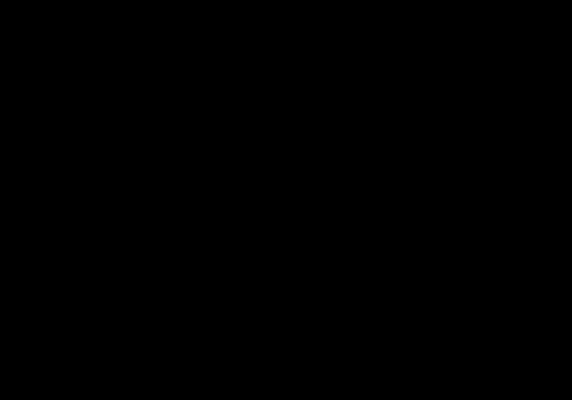

In [10]:
def plot_field(ax, color):

    #Pitch Outline & Centre Line
    ax.plot([0,0],[0,90], color=color)
    ax.plot([0,130],[90,90], color=color)
    ax.plot([130,130],[90,0], color=color)
    ax.plot([130,0],[0,0], color=color)
    ax.plot([130/2,130/2],[0,90], color=color, linewidth=0.5)

    #Left Penalty Area
    ax.plot([16.5,16.5],[130/2,25],color=color, linewidth=0.5)
    ax.plot([0,16.5],[130/2,130/2],color=color, linewidth=0.5)
    ax.plot([16.5,0],[25,25],color=color, linewidth=0.5)
        
    #Right Penalty Area
    ax.plot([130,113.5],[130/2,130/2],color=color, linewidth=0.5)
    ax.plot([113.5,113.5],[130/2,25],color=color, linewidth=0.5)
    ax.plot([113.5,130],[25,25],color=color, linewidth=0.5)
        
    #Left 6-yard Box
    ax.plot([0,5.5],[54,54],color=color, linewidth=0.5)
    ax.plot([5.5,5.5],[54,36],color=color, linewidth=0.5)
    ax.plot([5.5,0.5],[36,36],color=color, linewidth=0.5)
        
    #Right 6-yard Box
    ax.plot([130,124.5],[54,54],color=color, linewidth=0.5)
    ax.plot([124.5,124.5],[54,36],color=color, linewidth=0.5)
    ax.plot([124.5,130],[36,36],color=color, alpha=0.5)
        
    #Prepare Circles
    centreCircle = plt.Circle((130/2,90/2),9.15,color=color,fill=False, linewidth=0.5)
    centreSpot = plt.Circle((130/2,90/2),0.8,color=color, linewidth=0.5)
    leftPenSpot = plt.Circle((11,90/2),0.8,color=color, linewidth=0.5)
    rightPenSpot = plt.Circle((119,90/2),0.8,color=color, linewidth=0.5)
        
    #Draw Circles
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)
     
    #Prepare Arcs
    leftArc = Arc((11,45),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color=color, linewidth=0.5)
    rightArc = Arc((119,45),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color=color, linewidth=0.5)

    #Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)
      
    #Delete Axes
    ax.axis('off')
    
    #Set aspect equal
    ax.set_aspect('equal')

    return (ax)

fig, ax = plt.subplots(figsize=(10,10))
plot_field(ax, color='black')

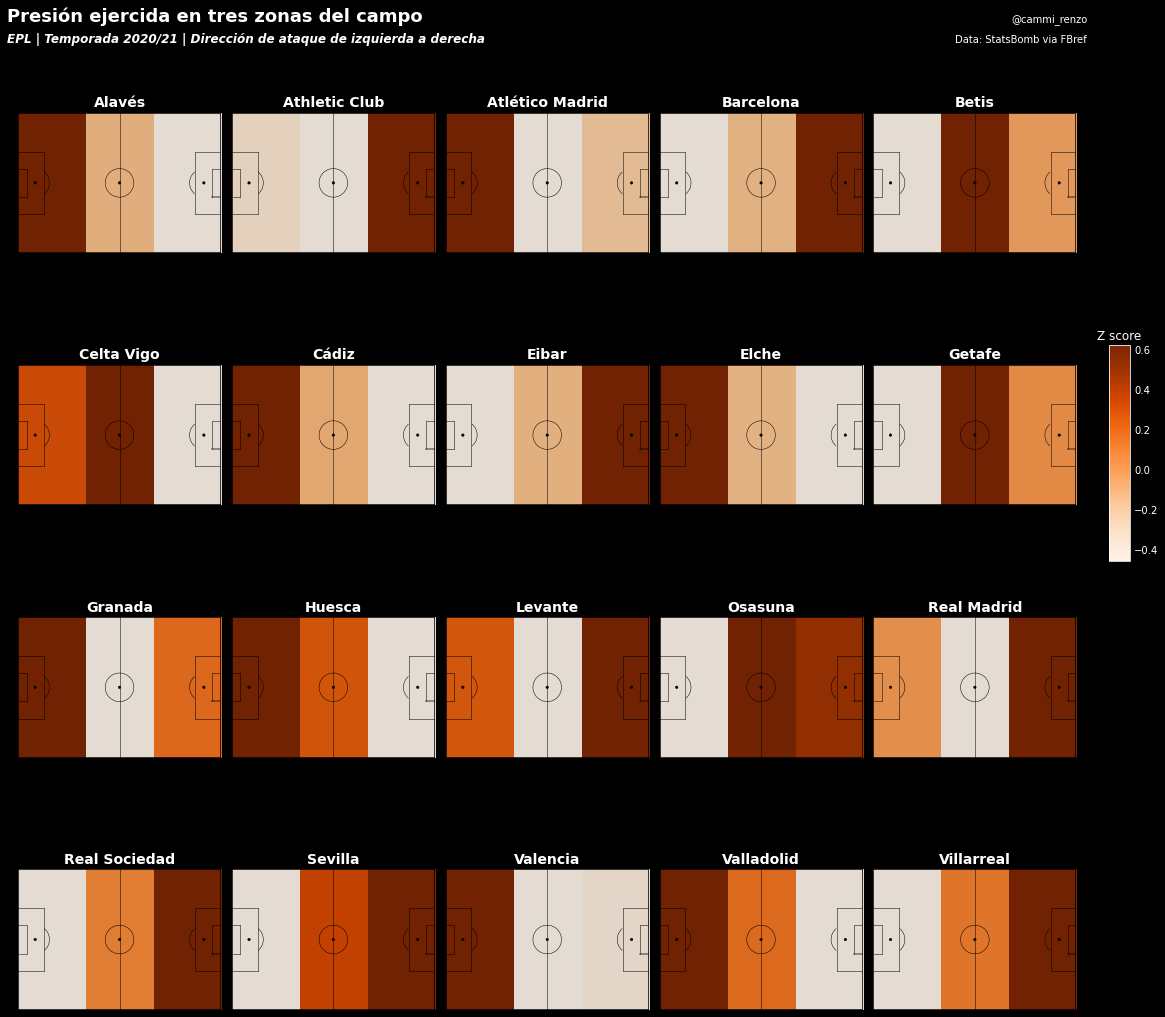

In [9]:
#for the pitch I used FCPython tutorial and adapted it for my means. Link: https://fcpython.com/visualisation/drawing-pitchmap-adding-lines-circles-matplotlib
#function variables are length, width and color of the pitch.

def press_viz(data, league, how, color):
    
    #set plot style
    plt.style.use('dark_background')

    #create figure
    # counts how many teams there are in the df
    cols = 5
    rows = (len(data.index.unique()) // cols) + (len(data.index.unique()) % cols > 0) 

    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))
    axes_list = [item for sublist in axes for item in sublist]

    if how == 'z score':

        #loop thru each axe of the figure 
        pressure_cols = ['z_1_adj', 'z_2_adj', 'z_3_adj']

        #use the groupby and loop thru it to plot data of each team in each subplot
        group = data.groupby(['Squad'] + pressure_cols)
        group_ordened = group['Total_press'].last().index

        #set title
        title = 'Presión'

    else:

       #loop thru each axe of the figure 
       pressure_cols = ['z_1', 'z_2', 'z_3']

       #use the groupby and loop thru it to plot data of each team in each subplot
       group = data.groupby(['Squad'] + pressure_cols)
       group_ordened = group['Total_press'].last().index

       #set title
       title = 'Porcentaje de presión' 

    for squad_data in group_ordened:
        selection = group.get_group(squad_data)

        ax = axes_list.pop(0)

        ## PLOT FIELD
        plot_field(ax, color='black')

        #COLOR
        #Set color by pressure percentages and normalize by the max and min values.
        colors = df_plot[pressure_cols].values
        #normal = plt.Normalize(colors.min(), colors.max())
        cmap=plt.cm.Oranges
        
        #Plot pressure for each team
        im = ax.imshow(selection[pressure_cols], zorder=0, aspect="auto", extent=(0,130,0,90), cmap=cmap, alpha=0.9)

        #Set titles
        ax.set_title(squad_data[0], fontsize=14, weight='bold')

        if how != 'z score':

            #Annotate the percentage value
            counter = 0
            for i in range(1,4):
                ax.annotate(str(squad_data[i]) + '%', xy=(counter + 130/6, 90/6), color='black', fontsize=14, ha='center', va='center', weight='bold')
                counter += 130/3
        
        else:
            pass

        #set aspect equal
        ax.set_aspect('equal')

    for ax in axes_list:
        ax.remove()

    #color bar
    #fmt = cbar.ticker.PercentFormatter()

    if how == 'z score':

        cax = fig.add_axes([1.02,0.5,0.02,0.2]) #vertical
        #cax = fig.add_axes([0.1,-0.02,0.8,0.02]) #horizontal
        cax.set_title('Z score', rotation=0)
        cb2 = fig.colorbar(im, cax=cax, cmap=cmap, alpha=0.9, orientation='vertical') #format=fmt
        cb2.ax.tick_params(size=0)
        #cbar.ColorbarBase
    
    else:
        pass

    #plot direction of play
    #plt.annotate('Dirección de ataque', xy=(600,7), xycoords='figure points', xytext=(400, 7/2), 
    #            arrowprops=dict(arrowstyle="->", color=color))
    #plt.annotate('Dirección de ataque de izquierda a derecha', xy=(50,50), xycoords='figure points')

    #plot main titles
    plt.figtext(0,1.00,'{title} ejercida en tres zonas del campo'.format(title=title), fontsize=18, ha='left', weight='bold', color=color)
    plt.figtext(0,0.98, '{league} | Temporada 2020/21 | Dirección de ataque de izquierda a derecha'.format(league=league), fontsize=12, fontstyle='italic', ha='left', weight='bold', color=color)

    #plot credits
    plt.figtext(1.0,1.00,'@cammi_renzo',
                ha='right',fontsize=10, color=color)
    plt.figtext(1.0,0.98,'Data: StatsBomb via FBref',
                ha='right', fontsize=10, color=color)

    #adjust subplots in the figure 
    plt.tight_layout()

    #save figure
    #plt.savefig('pressures_3Z.png', bbox_inches="tight", dpi=300)

    #Display Pitch
    plt.show()

data = df_plot
press = press_viz(data, league='EPL', how='z score', color='white')